In [1]:
from DataFiltering import DataFiltering, Pan_Tompkins_QRS 
from DataLoader import DataLoader

from scipy.signal import find_peaks
from ecgdetectors import Detectors

import matplotlib.pyplot as plt
import numpy as np

DATA_PATH = "./data/machine_running_test1.txt"

# Data Load & Basic Filtering

In [53]:
dataloader = DataLoader()
ecg, rsp, acc_x, acc_y, acc_z, hr = dataloader.dataload(DATA_PATH)

datafiltering = DataFiltering(sampling_rate=250)
ecg_filtered = datafiltering.lowpass_filter(ecg)
ecg_filtered = datafiltering.highpass_filter(ecg_filtered)
ecg_filtered = datafiltering.bandstop_filter(ecg_filtered)

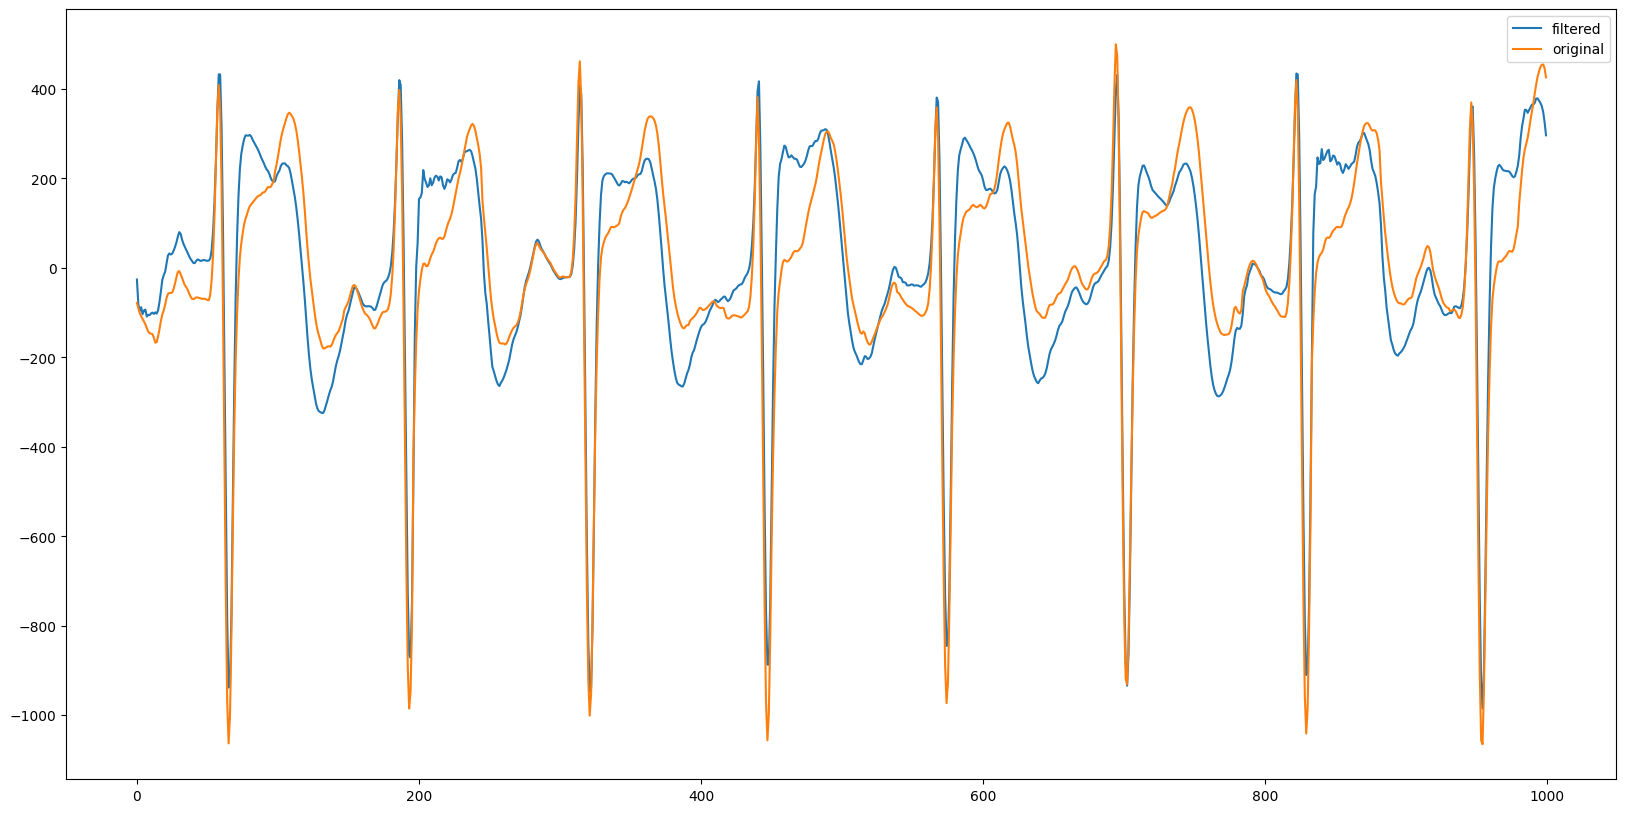

In [54]:
plt.figure(figsize=(20, 10))
plt.plot(ecg_filtered[:1000], label="filtered")
plt.plot(ecg[:1000], label="original")
plt.legend()
plt.show()

# R-peak Detection

/var/folders/gq/xnxpqv5x7jz19nnym4s4_l940000gn/T/ipykernel_5041/277836301.py:9: RuntimeWarning: invalid value encountered in power
  plt.plot(qrs_pan_tompkins[:view_range], ecg_filtered[qrs_pan_tompkins] ** 1.3, '-o', label="R-peak Squared")


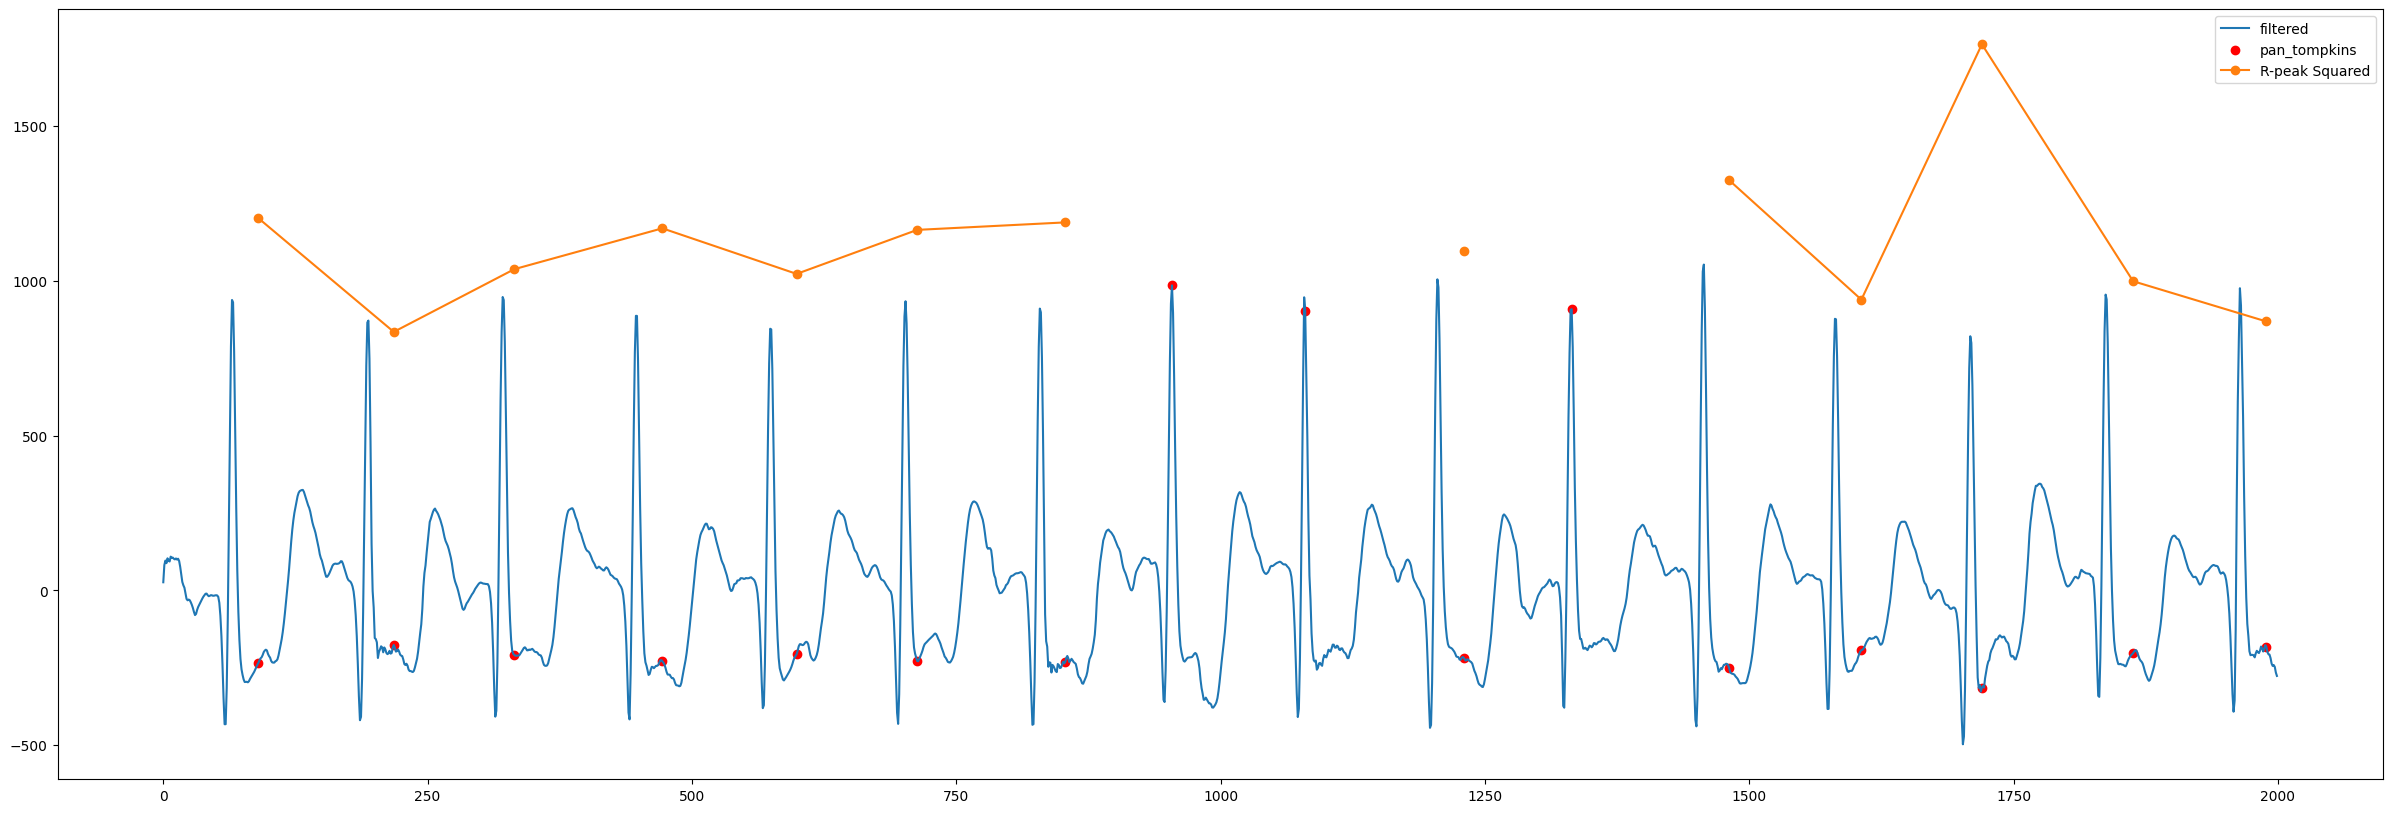

In [64]:
view_range = 2000

qrs_detector = Detectors(sampling_frequency=250)
qrs_pan_tompkins = np.array(qrs_detector.pan_tompkins_detector(-ecg_filtered[:view_range]))

plt.figure(figsize=(30, 10))
plt.plot(-ecg_filtered[:view_range], label="filtered")
plt.scatter(qrs_pan_tompkins, -ecg_filtered[qrs_pan_tompkins], label="pan_tompkins", c="red")
plt.plot(qrs_pan_tompkins[:view_range], ecg_filtered[qrs_pan_tompkins] ** 1.3, '-o', label="R-peak Squared")
plt.legend()
plt.show()

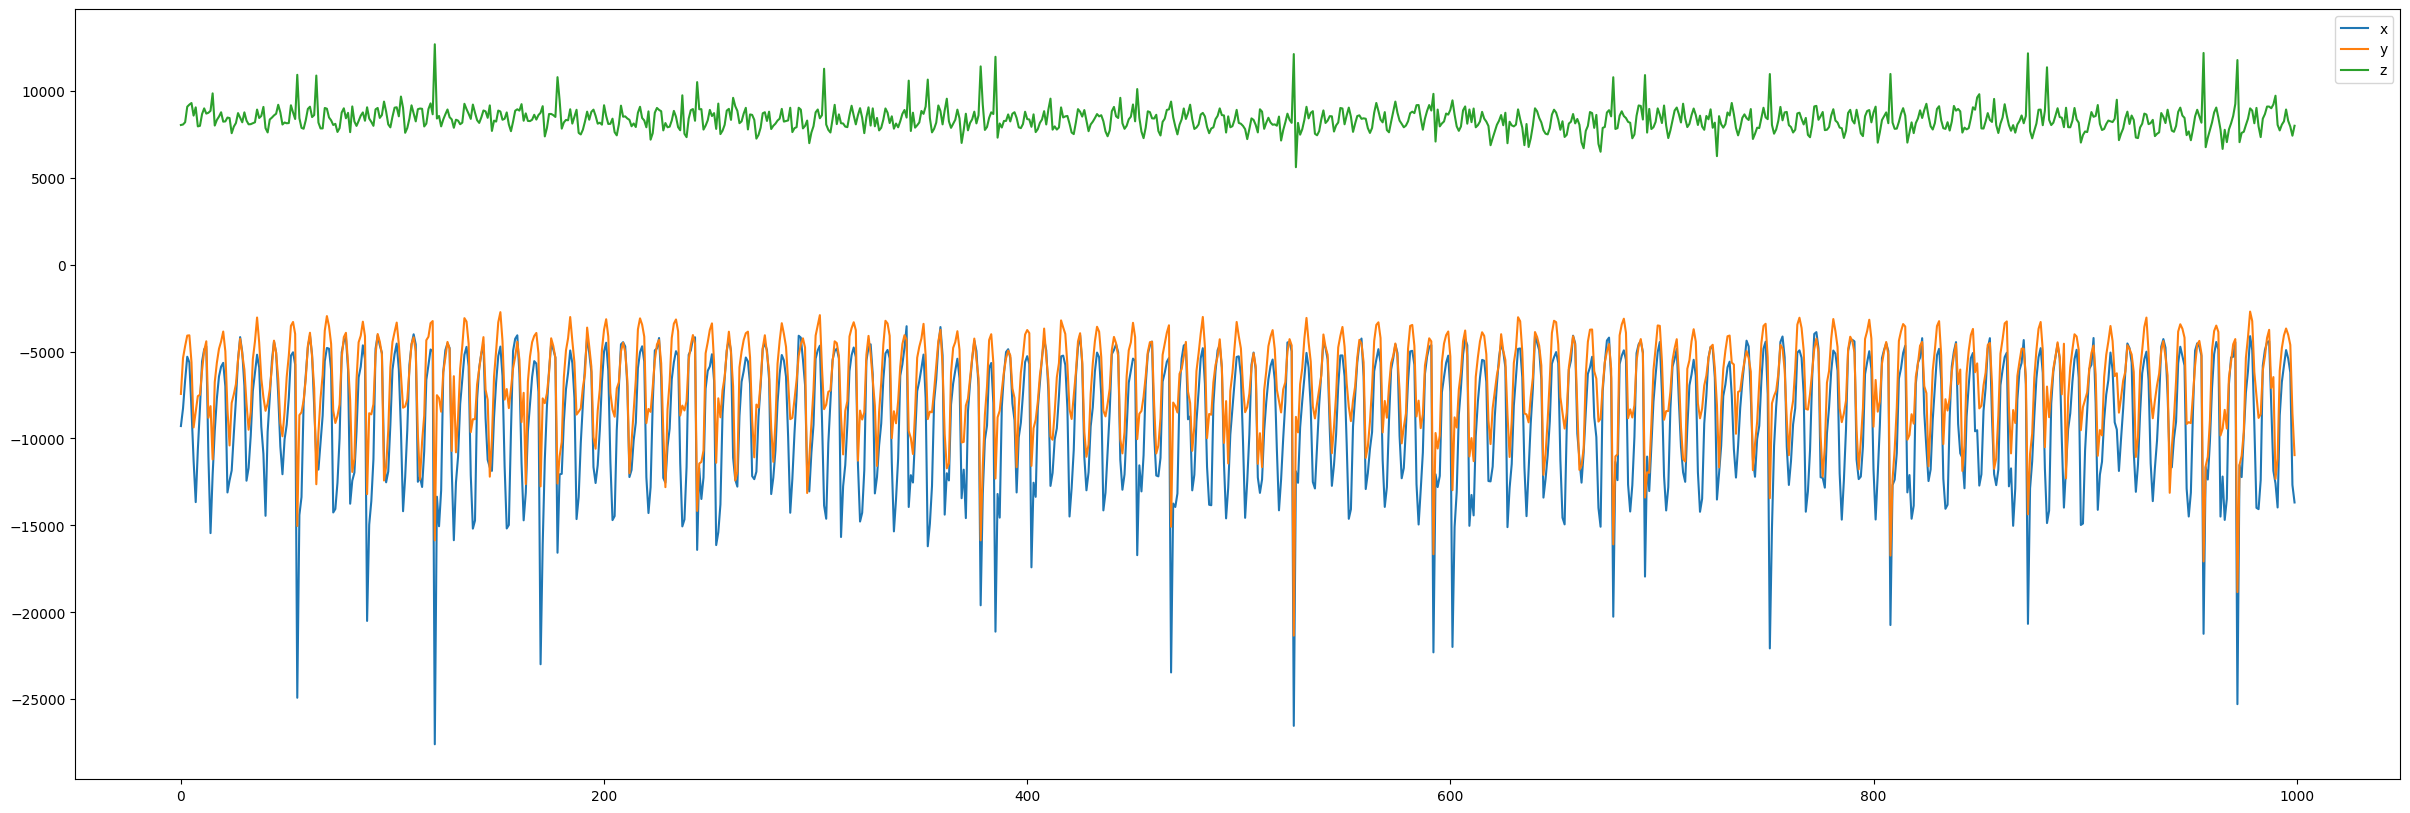

In [5]:
plt.figure(figsize=(30, 10))
plt.plot(acc_x[:1000], label="x")
plt.plot(acc_y[:1000], label="y")
plt.plot(acc_z[:1000], label="z")
plt.legend()
plt.show()

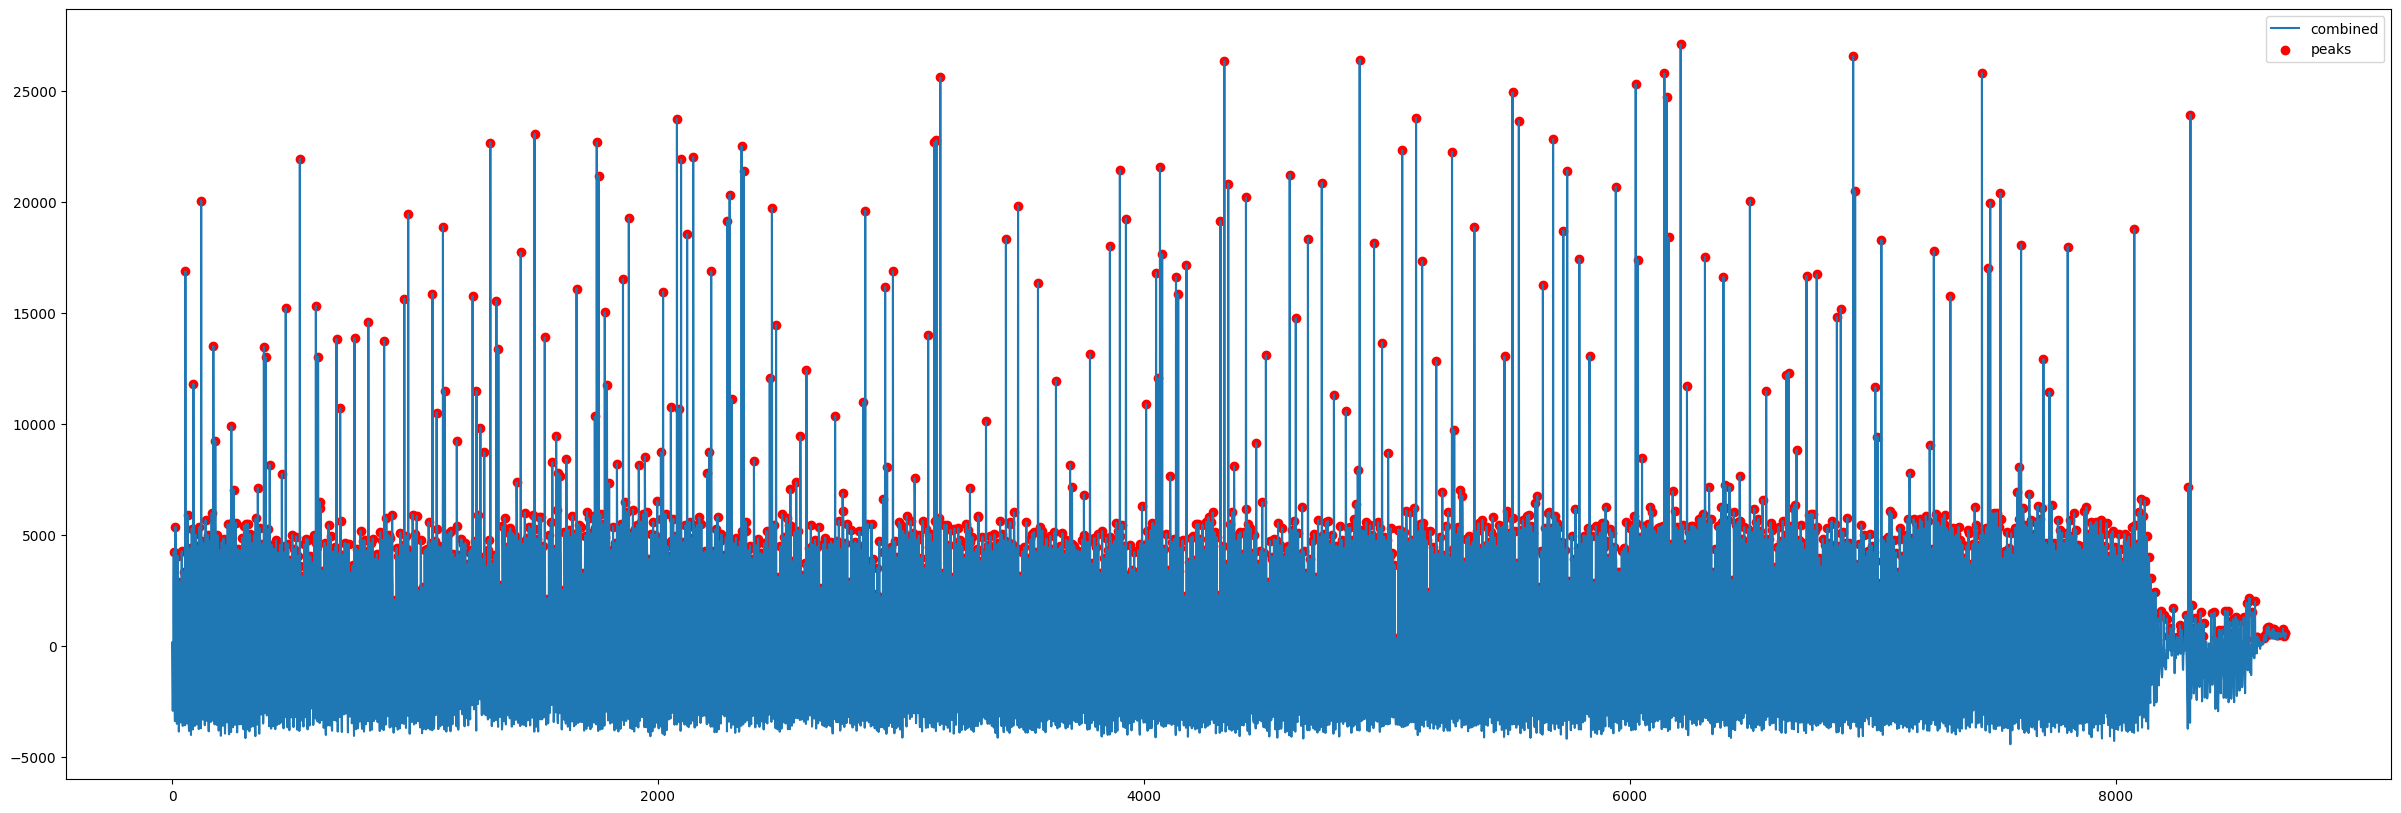

In [6]:
combined_acc = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)
combined_acc = combined_acc - np.mean(combined_acc)
peaks, _ = find_peaks(combined_acc, height=200)

plt.figure(figsize=(30, 10))
plt.plot(combined_acc, label="combined")
plt.scatter(peaks, combined_acc[peaks], label="peaks", c="red")
plt.legend()
plt.show()

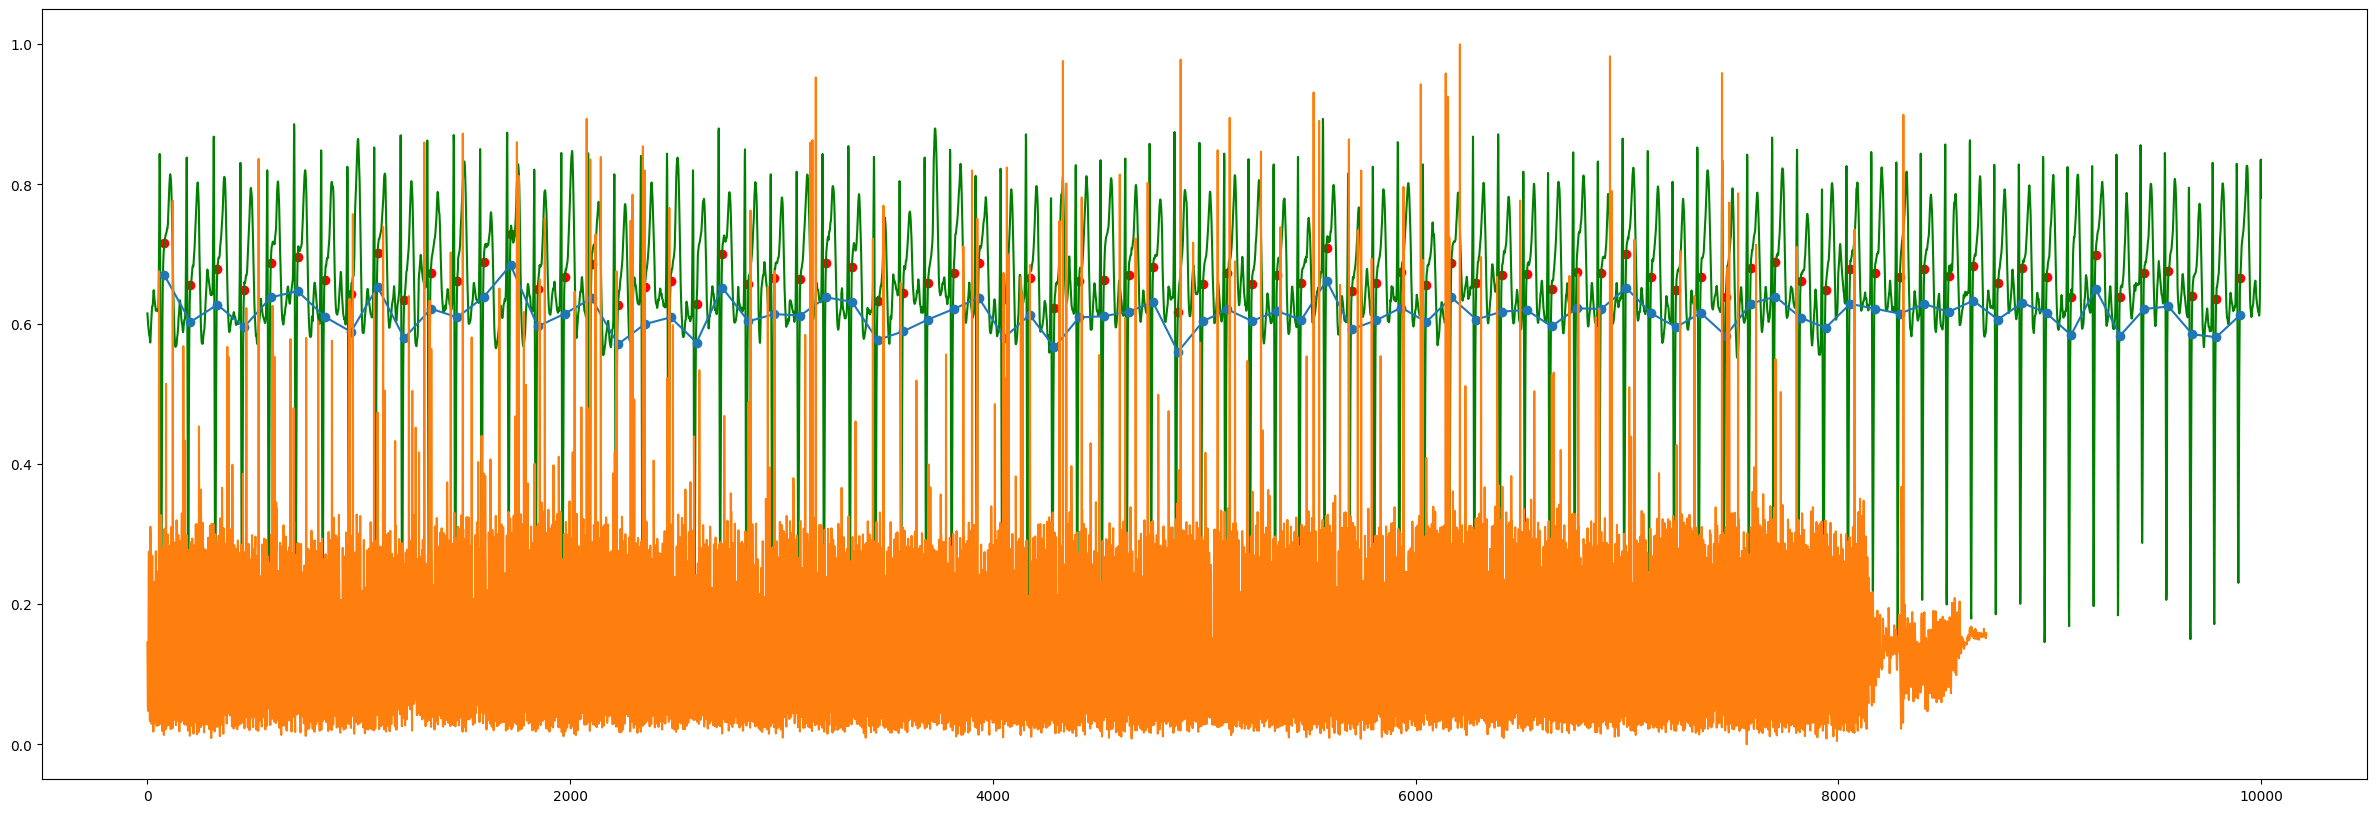

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
combined_acc = scaler.fit_transform(combined_acc.reshape(-1, 1)).reshape(-1)
ecg_normalized = scaler.fit_transform(ecg.reshape(-1, 1)).reshape(-1)
rsp_normalized = scaler.fit_transform(rsp.reshape(-1, 1)).reshape(-1)
hr_normalized = scaler.fit_transform(hr.reshape(-1, 1)).reshape(-1)

plt.figure(figsize=(30, 10))
plt.plot(ecg_normalized[:10000], label="filtered", c='green')
plt.scatter(qrs_pan_tompkins, ecg_normalized[qrs_pan_tompkins], label="pan_tompkins", c="red")
plt.plot(qrs_pan_tompkins, ecg_normalized[qrs_pan_tompkins] ** 1.2, '-o')
plt.plot(combined_acc[:10000])
plt.show()